In [1]:
import torch
import os
import time
from sklearn.neighbors import KDTree
from fine_tuning.retrieval_models import RetrievalModel
from fine_tuning.img_retrieval_test import run_evaluation_pipeline_with_attributes, compute_embedding
from fine_tuning.query_face_img import query_and_plot_images

In [2]:
PARENT_DIRNAME = os.path.expanduser("~/image-processing-project/")
IMAGE_DIR = os.path.join(PARENT_DIRNAME, "data/img_align_celeba/")
STORAGE_DATA_DIRNAME = os.path.join(PARENT_DIRNAME, "fine_tuning/data_for_fine_tuning")
MODEL_DIR = os.path.join(PARENT_DIRNAME, "fine_tuning/models")

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
train_loader = torch.load(os.path.join(STORAGE_DATA_DIRNAME, "train_loader.pth"))
query_loader = torch.load(os.path.join(STORAGE_DATA_DIRNAME, "query_loader.pth"))
gallery_loader = torch.load(os.path.join(STORAGE_DATA_DIRNAME, "gallery_loader.pth"))

/tmp/ipykernel_12778/2467728300.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_loader = torch.load(os.path.join(STORAGE_DATA_DIRNAME, "train_loader.pth"))
/tmp/ip

In [5]:
mobilnet_v2_model = RetrievalModel(backbone="mobilenet_v2", embedding_dim=128).to(device)
mobilnet_v2_model.load_state_dict(torch.load(os.path.join(MODEL_DIR, "mobilenet_v2_identity.pth")))

/home/letruongzzio/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/letruongzzio/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/tmp/ipykernel_12778/38340636.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECUR

<All keys matched successfully>

In [6]:
resnet50_model = RetrievalModel(backbone="resnet50", embedding_dim=128).to(device)
resnet50_model.load_state_dict(torch.load(os.path.join(MODEL_DIR, "resnet50_identity.pth")))

/home/letruongzzio/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/tmp/ipykernel_12778/3254508475.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed t

<All keys matched successfully>

# Evaluation

## MobileNetV2

In [7]:
mobilnet_v2_model.eval()

mbnet_query_embeddings, mbnet_query_filenames = compute_embedding(mobilnet_v2_model, query_loader, device)
mbnet_gallery_embeddings, mbnet_gallery_filenames = compute_embedding(mobilnet_v2_model, gallery_loader, device)

mbnet_tree = KDTree(mbnet_gallery_embeddings)

In [8]:
for i in [10, 20, 50, 100, 1000]:
    start_time = time.time()
    metrics = run_evaluation_pipeline_with_attributes(
        query_embeddings=mbnet_query_embeddings,
        gallery_embeddings=mbnet_gallery_embeddings,
        query_filenames=mbnet_query_filenames,
        gallery_filenames=mbnet_gallery_filenames,
        tree=mbnet_tree,
        k=i
    )
    end_time = time.time()
    print(f"Completed evaluation with k={i} in {end_time - start_time:.2f} seconds")

Evaluating retrieval performance using attributes and KDTree...
Top-10 Attribute Accuracy: 0.7962
Mean Attribute Distance: 0.4076
Completed evaluation with k=10 in 54.20 seconds
Evaluating retrieval performance using attributes and KDTree...
Top-20 Attribute Accuracy: 0.7928
Mean Attribute Distance: 0.4143
Completed evaluation with k=20 in 58.33 seconds
Evaluating retrieval performance using attributes and KDTree...
Top-50 Attribute Accuracy: 0.7896
Mean Attribute Distance: 0.4207
Completed evaluation with k=50 in 55.35 seconds
Evaluating retrieval performance using attributes and KDTree...
Top-100 Attribute Accuracy: 0.7868
Mean Attribute Distance: 0.4265
Completed evaluation with k=100 in 62.63 seconds
Evaluating retrieval performance using attributes and KDTree...
Top-1000 Attribute Accuracy: 0.7746
Mean Attribute Distance: 0.4508
Completed evaluation with k=1000 in 233.02 seconds


## ResNet50

In [9]:
resnet50_model.eval()

rnet_query_embeddings, rnet_query_filenames = compute_embedding(resnet50_model, query_loader, device)
rnet_gallery_embeddings, rnet_gallery_filenames = compute_embedding(resnet50_model, gallery_loader, device)

rnet_tree = KDTree(rnet_gallery_embeddings)

In [10]:
for i in [10, 20, 50, 100, 1000]:
    start_time = time.time()
    metrics = run_evaluation_pipeline_with_attributes(
        query_embeddings=rnet_query_embeddings,
        gallery_embeddings=rnet_gallery_embeddings,
        query_filenames=rnet_query_filenames,
        gallery_filenames=rnet_gallery_filenames,
        tree=rnet_tree,
        k=i
    )
    end_time = time.time()
    print(f"Completed evaluation with k={i} in {end_time - start_time:.2f} seconds")

Evaluating retrieval performance using attributes and KDTree...
Top-10 Attribute Accuracy: 0.8019
Mean Attribute Distance: 0.3962
Completed evaluation with k=10 in 55.74 seconds
Evaluating retrieval performance using attributes and KDTree...
Top-20 Attribute Accuracy: 0.7988
Mean Attribute Distance: 0.4023
Completed evaluation with k=20 in 55.69 seconds
Evaluating retrieval performance using attributes and KDTree...
Top-50 Attribute Accuracy: 0.7952
Mean Attribute Distance: 0.4097
Completed evaluation with k=50 in 57.81 seconds
Evaluating retrieval performance using attributes and KDTree...
Top-100 Attribute Accuracy: 0.7922
Mean Attribute Distance: 0.4156
Completed evaluation with k=100 in 64.28 seconds
Evaluating retrieval performance using attributes and KDTree...
Top-1000 Attribute Accuracy: 0.7807
Mean Attribute Distance: 0.4386
Completed evaluation with k=1000 in 234.70 seconds


# Query and exhibit results of the model

## MobileNetV2

Loading precomputed embeddings and labels...


/home/letruongzzio/image-processing-project/fine_tuning/query_face_img.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(MOD

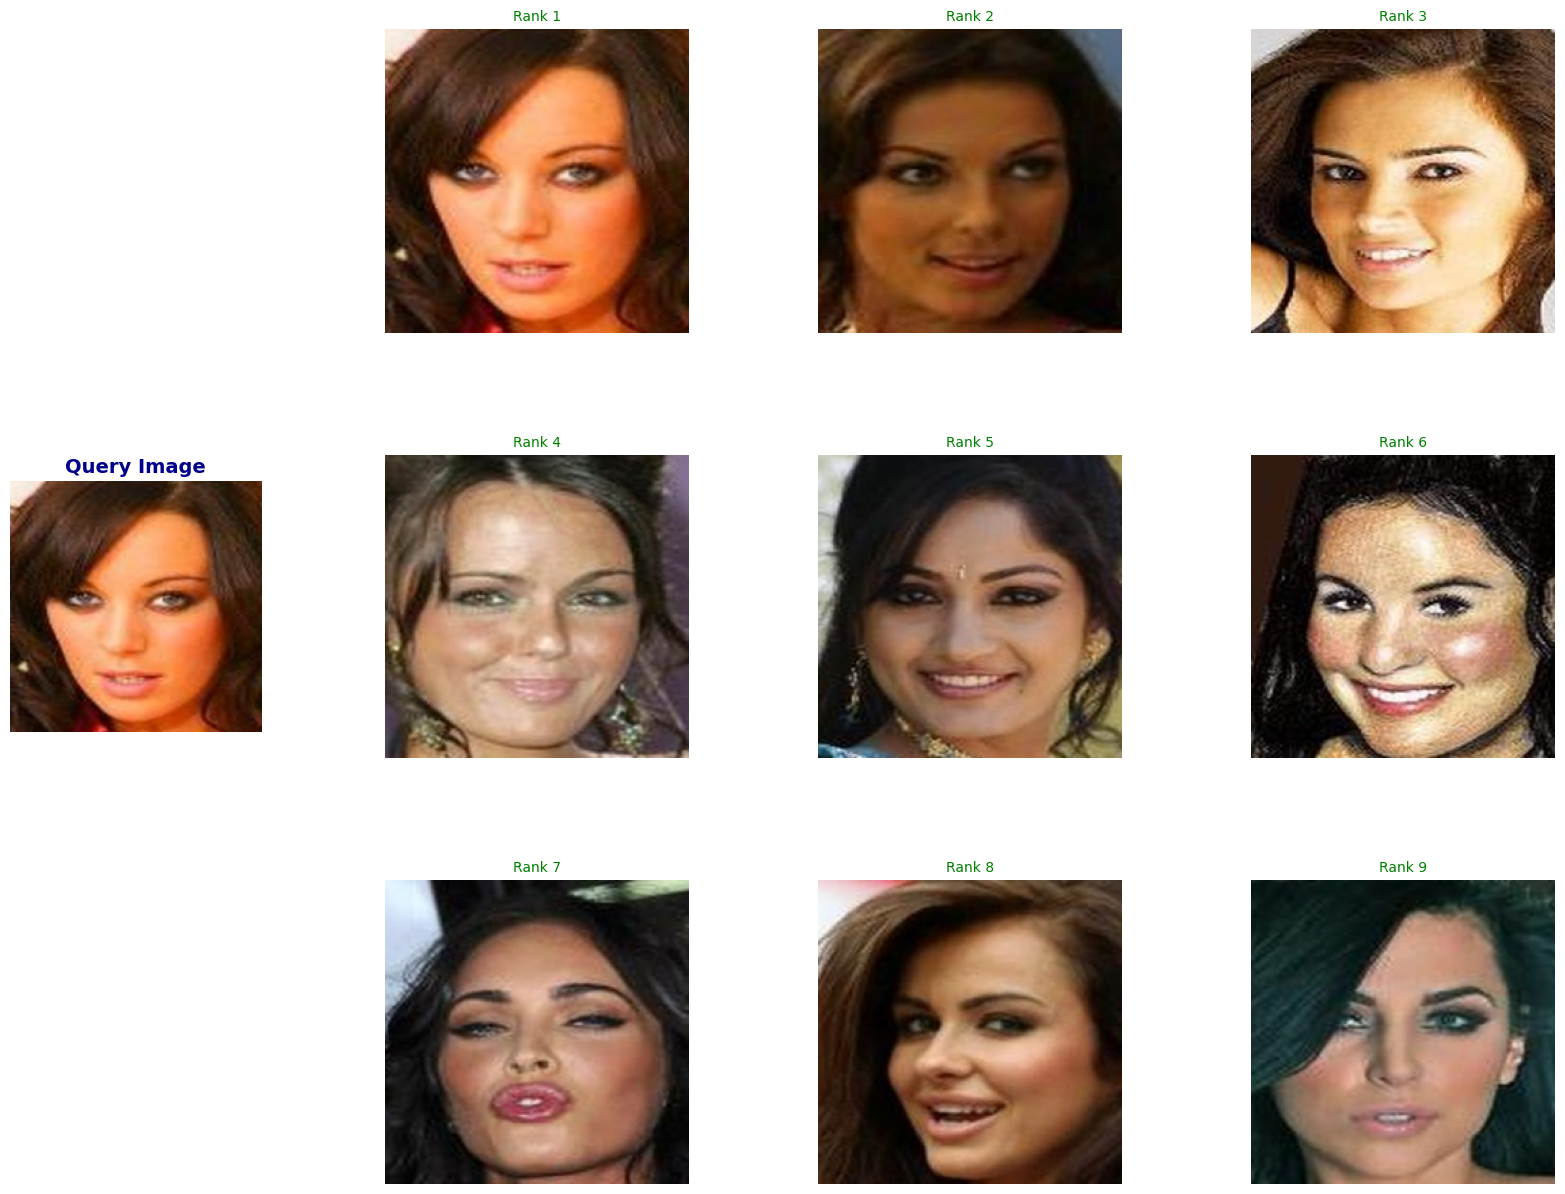

Gallery image paths:  ['/home/letruongzzio/image-processing-project/data/img_align_celeba/000611.jpg', '/home/letruongzzio/image-processing-project/data/img_align_celeba/019210.jpg', '/home/letruongzzio/image-processing-project/data/img_align_celeba/180302.jpg', '/home/letruongzzio/image-processing-project/data/img_align_celeba/105658.jpg', '/home/letruongzzio/image-processing-project/data/img_align_celeba/026463.jpg', '/home/letruongzzio/image-processing-project/data/img_align_celeba/075940.jpg', '/home/letruongzzio/image-processing-project/data/img_align_celeba/081444.jpg', '/home/letruongzzio/image-processing-project/data/img_align_celeba/103815.jpg', '/home/letruongzzio/image-processing-project/data/img_align_celeba/038077.jpg']
Distances:  [0.0037428  0.55478699 0.60942624 0.67011653 0.75795632 0.76577881
 0.77342279 0.79716004 0.80113321]


In [7]:
gallery_image_paths, distances = query_and_plot_images(
    query_image_path=os.path.join(IMAGE_DIR, "000611.jpg"),
    model="mobilenet_v2",
    top_k=9,
)

print("Gallery image paths: ", gallery_image_paths)
print("Distances: ", distances)

## ResNet50

Loading precomputed embeddings and labels...


/home/letruongzzio/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/letruongzzio/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/letruongzzio/image-processing-project/fine_tuning/query_face_img.py:98: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.c

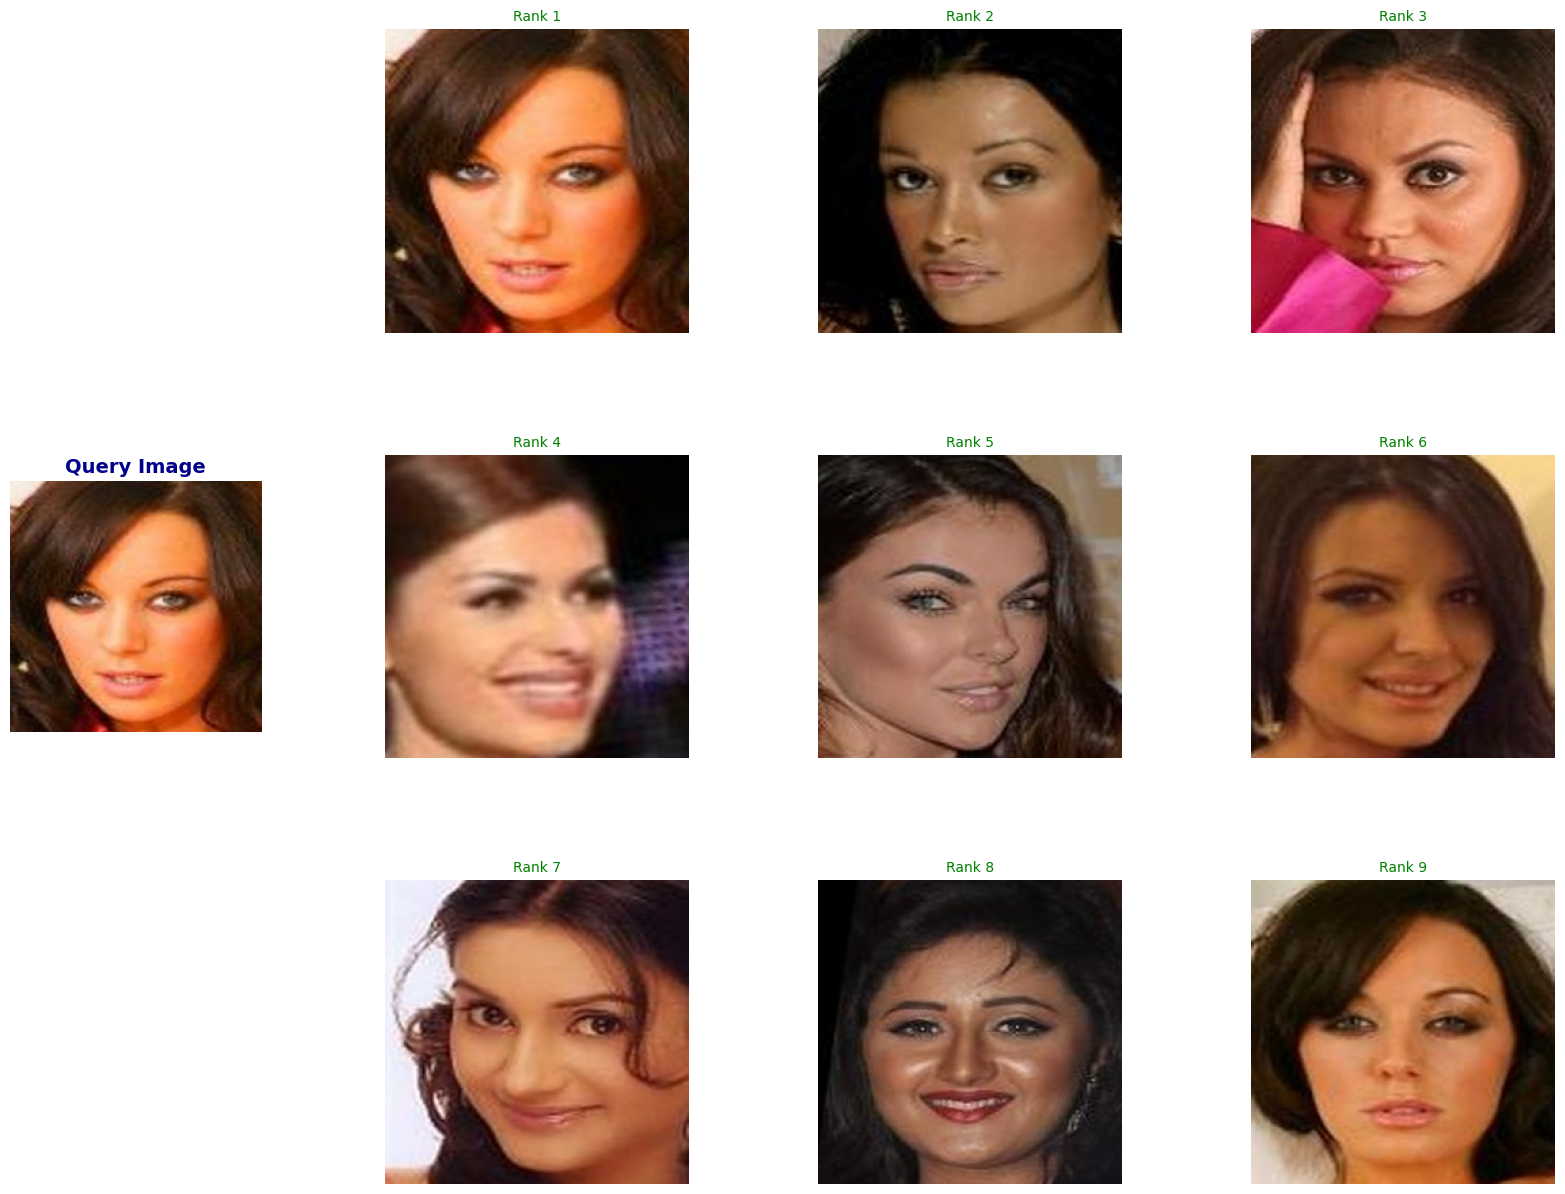

Gallery image paths:  ['/home/letruongzzio/image-processing-project/data/img_align_celeba/000611.jpg', '/home/letruongzzio/image-processing-project/data/img_align_celeba/140940.jpg', '/home/letruongzzio/image-processing-project/data/img_align_celeba/061941.jpg', '/home/letruongzzio/image-processing-project/data/img_align_celeba/157861.jpg', '/home/letruongzzio/image-processing-project/data/img_align_celeba/057424.jpg', '/home/letruongzzio/image-processing-project/data/img_align_celeba/074935.jpg', '/home/letruongzzio/image-processing-project/data/img_align_celeba/044705.jpg', '/home/letruongzzio/image-processing-project/data/img_align_celeba/130619.jpg', '/home/letruongzzio/image-processing-project/data/img_align_celeba/092579.jpg']
Distances:  [0.00253264 0.8472775  0.88685446 0.90504965 0.94500089 0.99004076
 1.08394356 1.09484946 1.10298082]


In [8]:
gallery_image_paths, distances = query_and_plot_images(
    query_image_path=os.path.join(IMAGE_DIR, "000611.jpg"),
    model="resnet50",
    top_k=9,
)

print("Gallery image paths: ", gallery_image_paths)
print("Distances: ", distances)